In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('cs-training.csv')

In [3]:
train_df.shape

(150000, 12)

In [4]:
train_df.set_index(['Unnamed: 0'], inplace=True)

In [5]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### 数据说明
##### SeriousDlqin2yrs：违约客户及超过90天逾期客户，bool型；
##### RevolvingUtilizationOfUnsecuredLines：贷款以及信用卡可用额度与总额度比例，百分比；
##### age：用户年龄，整型
##### NumberOfTime30-59DaysPastDueNotWorse：35-59天逾期但不糟糕次数，整型；
##### DebtRatio：负债率，百分比；
##### MonthlyIncome：月收入，整型；
##### NumberOfOpenCreditLinesAndLoans：开放式信贷和贷款数量，开放式贷款（分期付款如汽车贷款或抵押贷款）和信贷（如信用卡）的数量，整型；
##### NumberOfTimes90DaysLate：90天逾期次数：借款者有90天或更高逾期的次数，整型；
##### NumberRealEstateLoansOrLines：不动产贷款或额度数量：抵押贷款和不动产放款包括房屋净值信贷额度，整型；
##### NumberOfTime60-89DaysPastDueNotWorse：60-89天逾期但不糟糕次数：借款人在在过去两年内有60-89天逾期还款但不糟糕的次数，整型；
##### NumberOfDependents：家属数量：不包括本人在内的家属数量，整型；

In [7]:
columns = ({'SeriousDlqin2yrs':'target',
            'RevolvingUtilizationOfUnsecuredLines':'percentage',
           'NumberOfOpenCreditLinesAndLoans':'open_loan',
           'NumberOfTimes90DaysLate':'90-',
           'NumberRealEstateLoansOrLines':'estate_loan',
           'NumberOfTime60-89DaysPastDueNotWorse':'60-89',
           'NumberOfDependents':'Dependents',
           'NumberOfTime30-59DaysPastDueNotWorse':'30-59'}
          )

In [8]:
train_df.rename(columns=columns,inplace = True)

In [9]:
train_df.head()

,target,percentage,age,30-59,DebtRatio,MonthlyIncome,open_loan,90-,estate_loan,60-89,Dependents
Unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
missing_df = train_df.isnull().sum(axis=0).reset_index()

In [11]:
missing_df

,index,0
0,target,0
1,percentage,0
2,age,0
3,30-59,0
4,DebtRatio,0
5,MonthlyIncome,29731
6,open_loan,0
7,90-,0
8,estate_loan,0
9,60-89,0


In [12]:
train_df.MonthlyIncome.isnull().sum()/train_df.shape[0]

0.19820666666666667

In [13]:
train_df.Dependents.isnull().sum()/train_df.shape[0]

0.02616

#### 对于缺失值处理，有很多种方法：
##### 缺失值极多：若缺失值样本占总数比例极高，直接舍弃，因为作为特征加入反而会引入噪声值（可以使用删除近零常量的方法删除）。
##### 非连续特征缺失值适中：如果缺值的样本适中，而该属性非连续值特征属性，就把NaN作为一个新类别，加入到类别特征中。
##### 连续特征缺失值适中：如果缺值的样本适中，考虑给定一个step，然后离散化，将NaN作为一个type加入到属性类目中。
##### 缺失值较少：考虑利用填充的办法进行处理。其中有均值、众数、中位数填充。
##### 用sklearn里的RandomForest/KNN模型去拟合数据样本训练模型，然后去填充缺失值。
##### 拉格朗日插值法。

In [14]:
print(train_df['MonthlyIncome'].max())
print(train_df['MonthlyIncome'].min())
print(train_df['MonthlyIncome'].mean())
print(train_df['MonthlyIncome'].mode())
print(train_df['MonthlyIncome'].median())
print(train_df['MonthlyIncome'].skew())

3008750.0
0.0
6670.221237392844
0    5000.0
dtype: float64
5400.0
114.0403179452332


In [15]:
# 用随机森林对缺失值进行预测
from sklearn.ensemble import RandomForestRegressor

In [16]:
# 填充值预测函数
def rf_filling(df):
    process_miss = df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]
    know = process_miss[process_miss.MonthlyIncome.notnull()].as_matrix()
    unknow = process_miss[process_miss.MonthlyIncome.isnull()].as_matrix()
    X = know[:, 1:]
    y = know[:, 0]
    rf = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rf.fit(X, y)
    pred = rf.predict(unknow[:, 1:]).round(0)
    df.loc[df['MonthlyIncome'].isnull(), 'MonthlyIncome'] = pred
    return df

In [17]:
train_df = rf_filling(train_df)

C:\Users\feigeZzzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\feigeZzzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [18]:
print(train_df['MonthlyIncome'].max())
print(train_df['MonthlyIncome'].min())
print(train_df['MonthlyIncome'].mean())
print(train_df['MonthlyIncome'].mode())
print(train_df['MonthlyIncome'].median())
print(train_df['MonthlyIncome'].skew())

3008750.0
0.0
6025.802513333333
0    1159.0
dtype: float64
4973.0
123.94738320084522


In [19]:
train_df = train_df.dropna()
train_df = train_df.drop_duplicates()

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145563 entries, 1 to 150000
Data columns (total 11 columns):
target           145563 non-null int64
percentage       145563 non-null float64
age              145563 non-null int64
30-59            145563 non-null int64
DebtRatio        145563 non-null float64
MonthlyIncome    145563 non-null float64
open_loan        145563 non-null int64
90-              145563 non-null int64
estate_loan      145563 non-null int64
60-89            145563 non-null int64
Dependents       145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.3 MB


#### 异常值处理
##### 缺失值处理完毕后，我们还需要进行异常值处理。异常值是指明显偏离大多数抽样数据的数值，比如个人客户的年龄大于100或小于0时，通常认为该值为异常值。找出样本总体中的异常值，通常采用离群值检测的方法。 离群值检测的方法有单变量离群值检测、局部离群值因子检测、基于聚类方法的离群值检测等方法。
##### 在本数据集中，采用单变量离群值检测来判断异常值，采用箱线图。

In [21]:
import seaborn as sns

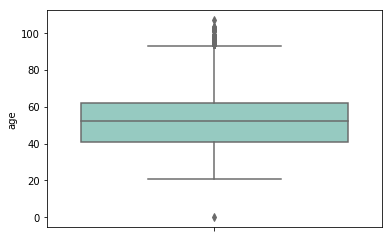

In [22]:
sns.boxplot(train_df.age, palette='Set3', orient='v')

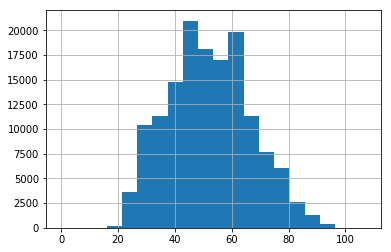

In [23]:
train_df.age.hist(bins=20)

In [24]:
train_df = train_df[(train_df.age>0) & (train_df.age < 100)]

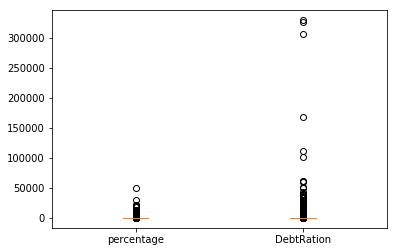

In [25]:
#RevolvingUtilizationOfUnsecuredLines 和 DebtRatio
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([train_df.percentage, train_df.DebtRatio])
ax.set_xticklabels(['percentage', 'DebtRation'])
plt.show()

#### 对于百分比大于1的为异常值，我们尝试分别用两种方法处理：1、直接删除；2、将离群值当空值处理，填充均值

In [26]:
# percentage为异常值的数量
sum((train_df.percentage > 1) | (train_df.percentage < 0))

3260

In [27]:
# DebtRation为异常值的数量
sum((train_df.DebtRatio > 1) | (train_df.DebtRatio < 0))

31682

In [28]:
train_df = train_df[(train_df.percentage <= 1) & (train_df.DebtRatio <= 1)]

In [29]:
train_df.shape

(111270, 11)

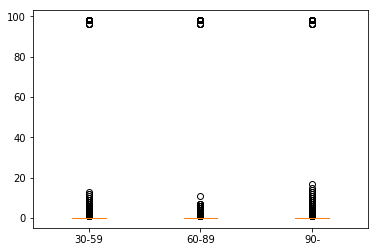

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([train_df['30-59'], train_df['60-89'], train_df['90-']])
ax.set_xticklabels(['30-59','60-89','90-'])
plt.show()

In [31]:
sum(train_df['30-59'] > 59) / train_df.shape[0]

0.0016626224498966478

In [32]:
sum(train_df['60-89'] > 89) / train_df.shape[0]

0.0016626224498966478

In [33]:
sum(train_df['90-'] > 90) / train_df.shape[0]

0.0016626224498966478

In [34]:
train_df = train_df[train_df['30-59']<60]
train_df = train_df[train_df['60-89']<90]
train_df = train_df[train_df['90-']<90]

In [35]:
train_df.reset_index(drop=True)

,target,percentage,age,30-59,DebtRatio,MonthlyIncome,open_loan,90-,estate_loan,60-89,Dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
7,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
8,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
9,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0


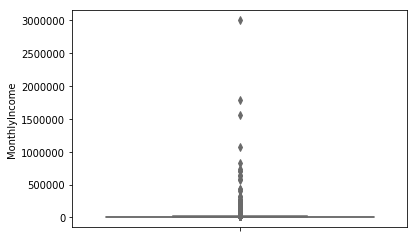

In [36]:
sns.boxplot(train_df.MonthlyIncome, palette='Set3', orient='v')

In [37]:
train_df[train_df.MonthlyIncome>50000].shape

(297, 11)

In [38]:
train_df = train_df[train_df.MonthlyIncome<50000]

In [39]:
train_df = train_df.reset_index(drop=True)

In [40]:
train_df.index

RangeIndex(start=0, stop=110768, step=1)

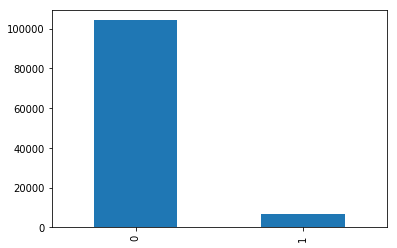

In [41]:
# 探索性数据分析 EDA
train_df.target.value_counts().plot(kind='bar')
# 不平衡数据

#### 坏账样本太少，可以考虑用重采样，随机或者用SMOTE

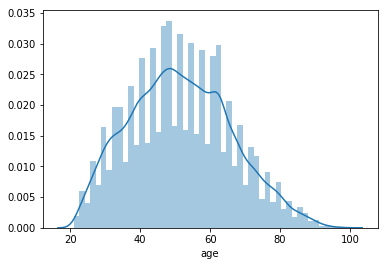

In [42]:
sns.distplot(train_df.age)

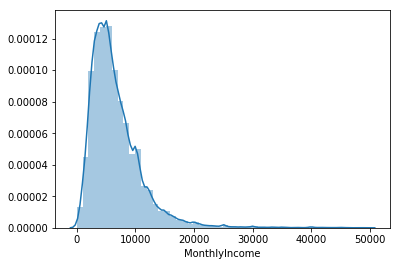

In [43]:
sns.distplot(train_df['MonthlyIncome'])

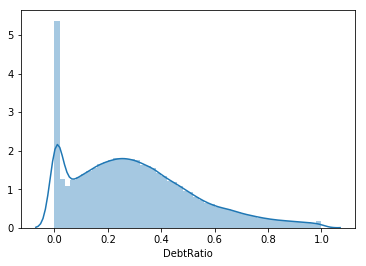

In [44]:
sns.distplot(train_df['DebtRatio'])

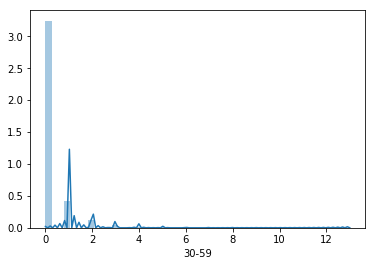

In [45]:
sns.distplot(train_df['30-59'])

In [46]:
corr = train_df.corr()

In [47]:
corr.shape

(11, 11)

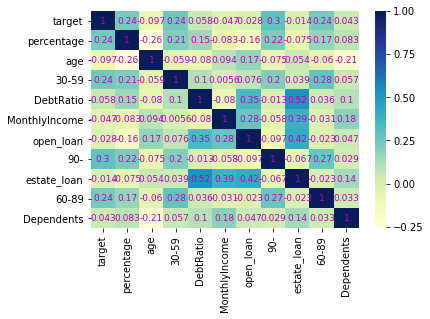

In [48]:
sns.heatmap(corr, annot=True, cmap='YlGnBu',annot_kws={'size': 9, 'color': 'm'})

#### 选择特征分箱
##### 变量分箱（binning）是对连续变量离散化（discretization）的一种称呼。信用评分卡开发中一般有常用的等距分段、等深分段、最优分段。其中等距分段（Equval length intervals）是指分段的区间是一致的，比如年龄以十年作为一个分段；等深分段（Equal frequency intervals）是先确定分段数量，然后令每个分段中数据数量大致相等；最优分段（Optimal Binning）又叫监督离散化（supervised discretizaion），使用递归划分（Recursive Partitioning）将连续变量分为分段，背后是一种基于条件推断查找较佳分组的算法。
#### woe分箱

In [49]:
from scipy import stats

In [50]:
def monoto_bin(Y, X, n=20):
    r = 0
    total_bad = Y.sum()
    total_good = Y.count() - total_bad
    while np.abs(r) < 1:
        d1 = pd.DataFrame({'X': X, 'Y': Y,
                           'Bucket': pd.cut(X, n, duplicates='raise')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.min().X, columns=['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['badattr'] = d3[Y.name]/total_bad
    d3['goodattr'] = (d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['total'] - d3[Y.name]) / total_good
    d3['woe'] = np.log(d3['goodattr']/d3['woe']).sum()
    iv = ((d3['goodattr'] - d3['badattr']) * d3['woe']).sum()
    d4 = (d3.sort_values(by='min_' + X.name)).reset_index(drop=True)
    print('=' * 8)
    cut = []
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua, 4))
    cut.append(float('-inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

In [51]:
total_bad = train_df.target.sum()
total_good = train_df.target.count() - total_bad
d1 = pd.DataFrame({'X': train_df.percentage, 'Y': train_df.target, 'Bucket': 
                  pd.cut(train_df.percentage, 20,
                          duplicates='drop', retbins=False)})
d2 = d1.groupby('Bucket', as_index=True)
r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
d3 = pd.DataFrame(d2.min().X, columns=['min_' + train_df.percentage.name])
pd.DataFrame(d2.min().X.values, columns=['min_' + train_df.percentage.name])
d3['min_' + train_df.percentage.name] = d2.min().X
d3['max_' + train_df.percentage.name] = d2.max().X
d3[train_df.target.name] = d2.sum().Y
d3['total'] = d2.count().Y
d3['badattr'] = d3[train_df.target.name] / total_bad
d3['goodattr'] = (d3['total'] - d3[train_df.target.name]) / total_good
d3['woe'] = np.log(d3['goodattr'] / d3['badattr'])
iv = ((d3['goodattr'] - d3['badattr']) * d3['woe']).sum()
d4 = (d3.sort_values(by='min_' + train_df.percentage.name)).reset_index(drop=True)
woe = list(d4['woe'].round(3))

In [52]:
woe

[1.218,
 1.109,
 0.798,
 0.728,
 0.471,
 0.584,
 0.178,
 0.195,
 -0.104,
 -0.0,
 -0.387,
 -0.466,
 -0.583,
 -0.551,
 -0.782,
 -0.95,
 -0.92,
 -1.097,
 -1.306,
 -1.311]

In [53]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx4 = [ninf,0,0.1,0.35,pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]

In [54]:
d2.min().X.values

array([0.        , 0.05000755, 0.10001747, 0.15000673, 0.20002417,
       0.25001875, 0.30001565, 0.35000488, 0.40000605, 0.45007209,
       0.50003906, 0.55002472, 0.60002539, 0.6500119 , 0.70000649,
       0.75001582, 0.80001613, 0.85000785, 0.9000102 , 0.9500125 ])

In [55]:
dfx1,ivx1,cutx1,woex1 = monoto_bin(train_df['target'],train_df['percentage'],n=10)
dfx2,ivx2,cutx2,woex2 = monoto_bin(train_df['target'],train_df['age'],n=10)
# dfx4,ivx4,cutx4,woex4 = monoto_bin(data_train['target'],data_train['DebtRatio'],n=10)
dfx5,ivx5,cutx5,woex5 = monoto_bin(train_df['target'],train_df['MonthlyIncome'],n=10)

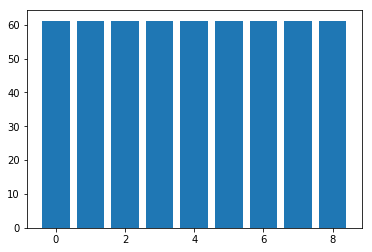

In [56]:
plt.bar(range(len(woex1)),woex1)
plt.show()

In [57]:
woex1

[61.165, 61.165, 61.165, 61.165, 61.165, 61.165, 61.165, 61.165, 61.165]

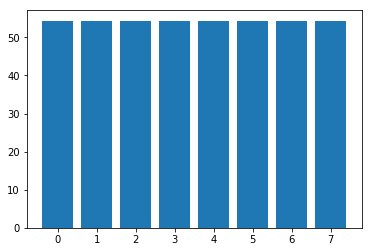

In [58]:
plt.bar(range(len(woex2)),woex2)#完全单调，分箱效果不错
plt.show()

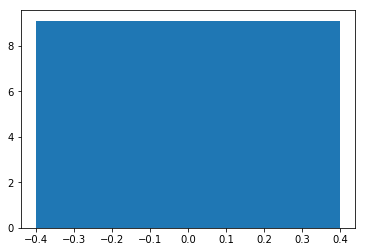

In [59]:
plt.bar(range(len(woex5)),woex5)
plt.show()

In [60]:
woex5

[9.107]

In [61]:
train_df.percentage.name

'percentage'

In [62]:

dfx1,ivx1,cutx1,woex1 = monoto_bin(train_df['target'],
                                   train_df['percentage'],n=10)

In [63]:
dfx1

,min_percentage,max_percentage,target,total,badattr,goodattr,woe
0,0.000000,0.111111,926,48389,0.139774,0.455748,61.165374
1,0.111113,0.222187,416,13617,0.062792,0.126758,61.165374
2,0.222227,0.333333,379,9189,0.057208,0.084595,61.165374
3,0.333365,0.444426,391,7171,0.059019,0.065103,61.165374
4,0.444450,0.555544,443,5933,0.066868,0.052716,61.165374
5,0.555568,0.666656,463,4877,0.069887,0.042384,61.165374
6,0.666667,0.777774,542,4451,0.081811,0.037535,61.165374
7,0.777791,0.888854,642,4345,0.096906,0.035557,61.165374
8,0.888971,1.000000,2423,12796,0.365736,0.099603,61.165374


In [68]:
def self_bin(Y, X, bin):
    r=0
    total_bad = Y.sum()
    total_good = Y.count()-total_bad
    d1 = pd.DataFrame({'X': X, 'Y': Y, 'Bucket': pd.cut(X, bin)})
    d2 = d1.groupby('Bucket', as_index=True)
    r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
    
    d3 = pd.DataFrame(d2.min().X, columns=['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['badattr'] = d3[Y.name]/total_bad
    d3['goodattr'] = (d3['total'] - d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by='min_' + X.name)).reset_index(drop=True)
    print('=' * 80)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

In [69]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx4 = [ninf,0,0.1,0.35,pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]

In [70]:
cutx5

[-inf, -inf]

In [71]:
dfx3, ivx3,woex3 = self_bin(train_df['target'],train_df['30-59'],cutx3)
dfx4, ivx4,woex4 = self_bin(train_df['target'],train_df['DebtRatio'],cutx4)
dfx6, ivx6,woex6 = self_bin(train_df['target'],train_df['open_loan'],cutx6) 
dfx7, ivx7,woex7 = self_bin(train_df['target'],train_df['90-'],cutx7)
dfx8, ivx8,woex8 = self_bin(train_df['target'],train_df['estate_loan'],cutx8) 
dfx9, ivx9,woex9 = self_bin(train_df['target'],train_df['60-89'],cutx9)
dfx10, ivx10,woex10 = self_bin(train_df['target'],train_df['Dependents'],cutx10)

In [72]:
y=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]

In [73]:
y

[-3.552713678800501e-15,
 0.0,
 0.6120681880989212,
 0.05116970808641154,
 0.0,
 0.08990559096118998,
 0.7657492135717637,
 0.04415850355915963,
 0.4767134098480978,
 0.03297196404622166]

In [74]:
index=train_df.columns.drop('target')

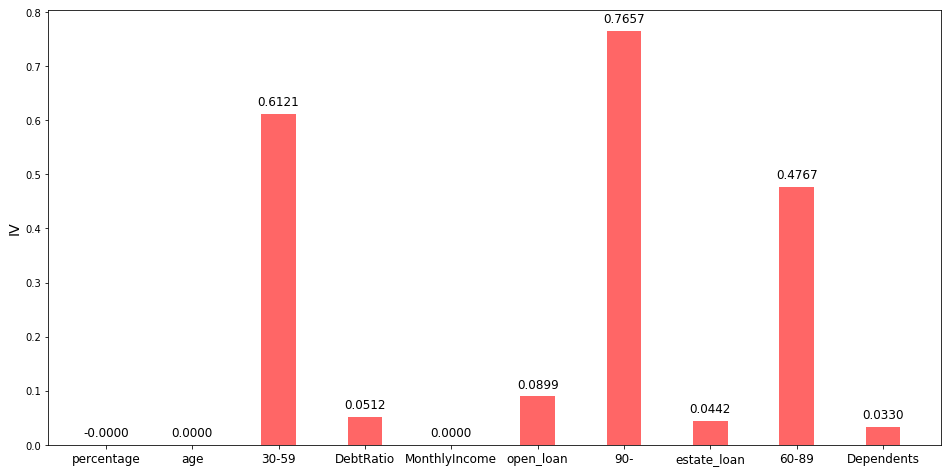

In [77]:
fig= plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(range(1,11), y, width=0.4,color = 'r',alpha = 0.6)#生成柱状图
ax1.set_xticks(range(1,11))
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV', fontsize=14)
for i, v in enumerate(y):
    plt.text(i+1, v+0.01, '%.4f' % v, ha='center', va='bottom', fontsize=12)
plt.show()

In [78]:
def change_woe(d, cut, woe):
    list = []
    i = 0
    while i<len(d):
        value = d[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j -= -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [ ]:
data_train['percentage'] = pd.Series(change_woe(data_train['percentage'], cutx1, woex1))
data_train['age'] = pd.Series(change_woe(data_train['age'], cutx2, woex2))
data_train['30-59'] = pd.Series(change_woe(data_train['30-59'], cutx3, woex3))
data_train['DebtRatio'] = pd.Series(change_woe(data_train['DebtRatio'], cutx4, woex4))
data_train['MonthlyIncome'] = pd.Series(change_woe(data_train['MonthlyIncome'], cutx5, woex5))
data_train['open_loan'] = pd.Series(change_woe(data_train['open_loan'], cutx6, woex6))
data_train['90-'] = pd.Series(change_woe(data_train['90-'], cutx7, woex7))
data_train['estate_loan'] = pd.Series(change_woe(data_train['estate_loan'], cutx8, woex8))
data_train['60-89'] = pd.Series(change_woe(data_train['60-89'], cutx9, woex9))
data_train['Dependents'] = pd.Series(change_woe(data_train['Dependents'], cutx10, woex10))

In [80]:
woex1

[61.165, 61.165, 61.165, 61.165, 61.165, 61.165, 61.165, 61.165, 61.165]

In [ ]:
train_df['percentage'] = pd.Series(change_woe(train_df.percentage, 
                                              cutx1, woex1))